In [63]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns
df=pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [64]:
print(df.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     34240.000000              34240.000000  34240.000000   
mean         11.774987                 10.640907      0.719153   
std           9.511259                 10.621795      0.192921   
min         -16.666667                -24.233333      0.000000   
25%           4.855556                  2.227778      0.590000   
50%          11.244444                 11.244444      0.770000   
75%          18.750000                 18.750000      0.880000   
max          39.905556                 38.377778      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       34240.000000            34239.000000     34239.000000     34239.0   
mean           10.988779              190.590058        10.075350         0.0   
std             7.086605              106.365533         3.786828         0.0   
min             0.000000                0.000000         0.000000         0.0   


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34240 entries, 0 to 34239
Data columns (total 12 columns):
Formatted Date              34240 non-null object
Summary                     34240 non-null object
Precip Type                 34240 non-null object
Temperature (C)             34240 non-null float64
Apparent Temperature (C)    34240 non-null float64
Humidity                    34240 non-null float64
Wind Speed (km/h)           34240 non-null float64
Wind Bearing (degrees)      34239 non-null float64
Visibility (km)             34239 non-null float64
Loud Cover                  34239 non-null float64
Pressure (millibars)        34239 non-null float64
Daily Summary               34239 non-null object
dtypes: float64(8), object(4)
memory usage: 3.1+ MB


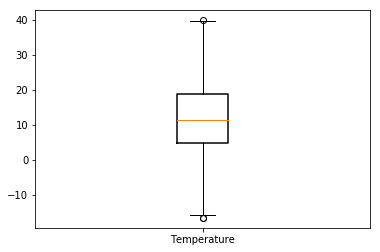

In [66]:
#as is seen, loud cover is an empty column. Hence, we will drop this.
fig, ax = plt.subplots(1,1)
bxpstats = list()
for dataset, label in zip([df[['Temperature (C)']]], ['Temperature']):
    bxpstats.extend(cbook.boxplot_stats(np.ravel(dataset), labels=[label]))
ax.bxp(bxpstats)
plt.show()

#As is shown in the boxplot below, outliers are temperatures below -10(C) and above 40(C)

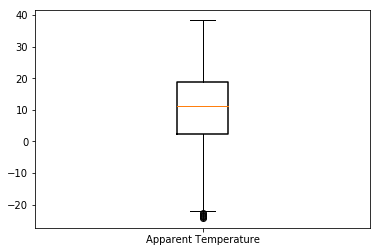

In [67]:
fig, ax = plt.subplots(1,1)
bxpstats = list()
for dataset, label in zip([df[['Apparent Temperature (C)']]], ['Apparent Temperature']):
    bxpstats.extend(cbook.boxplot_stats(np.ravel(dataset), labels=[label]))
ax.bxp(bxpstats)
plt.show()

#As is shown in the boxplot below, outliers are temperatures below -20(C)

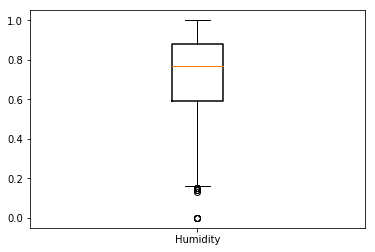

In [68]:
fig, ax = plt.subplots(1,1)
bxpstats = list()
for dataset, label in zip([df[['Humidity']]], ['Humidity']):
    bxpstats.extend(cbook.boxplot_stats(np.ravel(dataset), labels=[label]))
ax.bxp(bxpstats)
plt.show()

('Correlation : ', (-0.6251666558309833, 0.0))


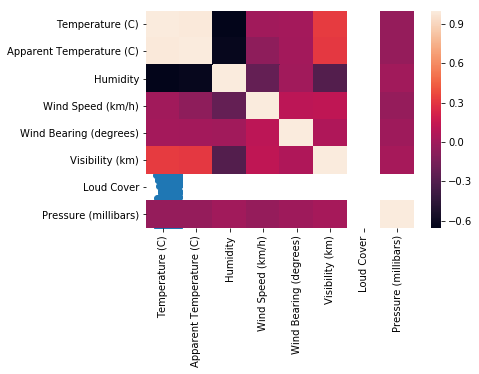

In [69]:
plt.scatter(df['Humidity'],df['Apparent Temperature (C)'])
plt.xlabel("Humidity")
plt.ylabel("Temp")
#as is seen, as temperature increases, humidity decreases
#correlation of features : temp vs humidity
#we can use pearson's ranking coeff to see the correlation.
from scipy.stats.stats import pearsonr
print("Correlation : ",pearsonr(df['Apparent Temperature (C)'],df['Humidity']))

#relationships between labels and features
sns.heatmap(df.corr())

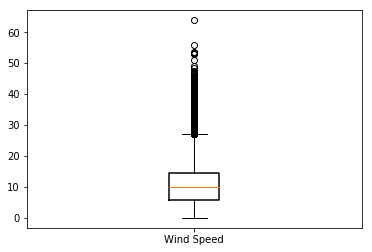

In [70]:
fig, ax = plt.subplots(1,1)
bxpstats = list()
for dataset, label in zip([df[['Wind Speed (km/h)']]], ['Wind Speed']):
    bxpstats.extend(cbook.boxplot_stats(np.ravel(dataset), labels=[label]))
ax.bxp(bxpstats)
plt.show()

#As is seen in the boxplot below : quite a few values lie outside the mean value of 10 kmph, meaning a different categorical variable may cause winds to reach higher wind percentages
#Also note that values above 45kmph are scattered, and values > 60kmph are outliers

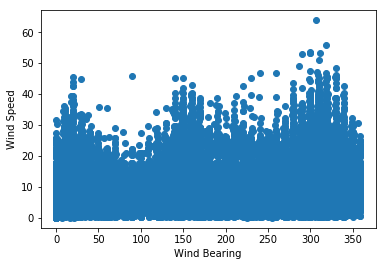

In [71]:
plt.scatter(df[['Wind Bearing (degrees)']],df[['Wind Speed (km/h)']])
plt.xlabel('Wind Bearing')
plt.ylabel('Wind Speed')
plt.show()
#as is shown in the graph, the distribution between wind speed and wind bearing is very random. Wind bearing doesnt affect wind speed. Hence, can be removed.

<function matplotlib.pyplot.show>

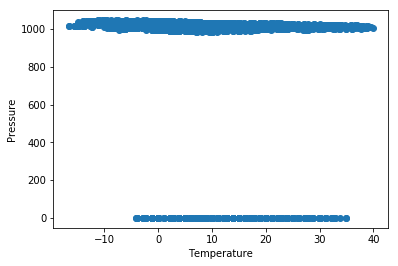

In [72]:
plt.scatter(df[['Temperature (C)']],df[['Pressure (millibars)']])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show
#as is shown in the graph, there is a descrepency between pressure and temperature : hence, impute / fill values

In [73]:
print(df['Pressure (millibars)'])

0        1015.13
1        1015.63
2        1015.94
3        1016.41
4        1016.51
5        1016.66
6        1016.72
7        1016.84
8        1017.37
9        1017.22
10       1017.42
11       1017.74
12       1017.59
13       1017.48
14       1017.17
15       1016.47
16       1016.15
17       1016.17
18       1015.82
19       1015.83
20       1015.85
21       1015.77
22       1015.40
23       1015.51
24       1014.40
25       1014.20
26       1008.71
27       1014.47
28       1014.45
29       1014.49
          ...   
34210    1030.94
34211    1030.60
34212    1030.20
34213    1029.54
34214    1029.00
34215    1028.60
34216    1028.51
34217    1028.30
34218    1028.60
34219    1028.71
34220    1028.70
34221    1028.80
34222    1028.89
34223    1028.70
34224    1017.90
34225    1017.60
34226    1017.88
34227    1017.50
34228    1017.30
34229    1017.41
34230    1017.40
34231    1017.70
34232    1018.06
34233    1017.80
34234    1017.80
34235    1017.60
34236    1017.20
34237    1016.

In [76]:
#treating errors and outliers
#df['Pressure (millibars)']=df['Pressure (millibars)'].replace(0,np.NaN)
df.dropna(how='any',inplace=True)

In [79]:
#fill values where pressure = 0 (since that is an error), a redrawn graph can be made after this operation
df['Pressure (millibars)'].replace(to_replace=0,value=1000.797949,inplace=True) #since 1000.797949 is the mean pressure
df['Pressure (millibars)']

0        1015.13
1        1015.63
2        1015.94
3        1016.41
4        1016.51
5        1016.66
6        1016.72
7        1016.84
8        1017.37
9        1017.22
10       1017.42
11       1017.74
12       1017.59
13       1017.48
14       1017.17
15       1016.47
16       1016.15
17       1016.17
18       1015.82
19       1015.83
20       1015.85
21       1015.77
22       1015.40
23       1015.51
24       1014.40
25       1014.20
26       1008.71
27       1014.47
28       1014.45
29       1014.49
          ...   
34209    1030.90
34210    1030.94
34211    1030.60
34212    1030.20
34213    1029.54
34214    1029.00
34215    1028.60
34216    1028.51
34217    1028.30
34218    1028.60
34219    1028.71
34220    1028.70
34221    1028.80
34222    1028.89
34223    1028.70
34224    1017.90
34225    1017.60
34226    1017.88
34227    1017.50
34228    1017.30
34229    1017.41
34230    1017.40
34231    1017.70
34232    1018.06
34233    1017.80
34234    1017.80
34235    1017.60
34236    1017.

<function matplotlib.pyplot.show>

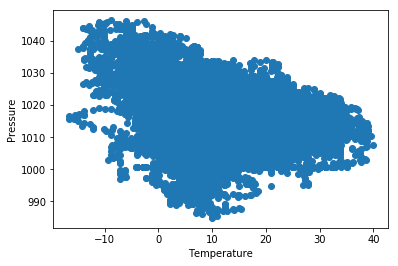

In [84]:
#replotting graph after entering missing values
plt.scatter(df[['Temperature (C)']],df[['Pressure (millibars)']])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show

#As is seen below, temperature variations of over 50 degrees result in only only a 50 millibar pressure drop/increase
#By this room of thought, we can imply that pressure is virtually unaffected by the temperatures, for this dataset.
#As such, we can do a pre-emptive analysis without pressures and loud cover

In [85]:
#categorical features - features and frequency
print(df.groupby(df['Precip Type']).groups)
grouped=df.groupby(df['Precip Type'])
for name,group in grouped:
    print("Name : ",name)
    print("Group :",group)


{'snow': Int64Index([ 1562,  1563,  1564,  1565,  1566,  1567,  1568,  1569,  1570,
             1571,
            ...
            32909, 32925, 32926, 33173, 33412, 33413, 34206, 34207, 34220,
            34221],
           dtype='int64', length=3854), 'rain': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34229, 34230, 34231, 34232, 34233, 34234, 34235, 34236, 34237,
            34238],
           dtype='int64', length=30385)}
('Name : ', 'rain')
('Group :',                       Formatted Date                Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200          Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200          Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200          Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200          Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200          Mostly Cloudy        rain   
5      200

In [90]:
#we can make dataframes with respect to our categorical values, i.e. precipitation types

gb=df.groupby(df['Precip Type'])
[gb.get_group(x) for x in gb.groups]

[                      Formatted Date                   Summary Precip Type  \
 1562   2006-12-13 02:00:00.000 +0100                     Foggy        snow   
 1563   2006-12-13 03:00:00.000 +0100                     Foggy        snow   
 1564   2006-12-13 04:00:00.000 +0100                     Foggy        snow   
 1565   2006-12-13 05:00:00.000 +0100                     Foggy        snow   
 1566   2006-12-13 06:00:00.000 +0100                     Foggy        snow   
 1567   2006-12-13 07:00:00.000 +0100                     Foggy        snow   
 1568   2006-12-13 08:00:00.000 +0100                     Foggy        snow   
 1569   2006-12-13 09:00:00.000 +0100                     Foggy        snow   
 1570   2006-12-13 10:00:00.000 +0100                     Foggy        snow   
 1571   2006-12-13 11:00:00.000 +0100                     Foggy        snow   
 1581   2006-12-13 21:00:00.000 +0100                     Foggy        snow   
 1583   2006-12-13 23:00:00.000 +0100               

In [91]:
#WEEK - 2

#Date can be formatted to be of format YYYY-MM-DD , which is easier to write and test against later.
#dropping duplicate formatted dates (taking care of duplicate values)
df.drop_duplicates(subset="Formatted Date",inplace=True)
#temperatures and humidity, wind speeds can be identical, hence no dropping is required here.

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [94]:
#missing values for pressure have been treated. We will now check for null/missing values in other attributes
df.isnull().values.any()

False

In [198]:
#As the value is false, there are no NaN values in the dataframe
#To treat errors and outliers, we will revisit all the graphs and take care of the features individually
#Outliers are in temperature, humidity, apparent temperature
# Date, Summary, Precip Type and Daily summary are categorical values with no outliers, they can only serve as labels
#Wind bearing and loud cover do not affect the outcome of class labels, and hence shall be dropped
#Pressure (millibars) has been taken care of.
from sklearn.svm import SVC
svm=SVC()
main_val=['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
X=df[main_val]
Y=df['Summary']
#splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
svm.fit(X_train,Y_train) #fit SVM model     
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, Y_train)))

Accuracy of SVM classifier on training set: 0.69
